Seleção de outputs: Simbolicos ou Valores reais

In [1]:
# Para outputs simbolicos, sim = 1
# Para outputs reais, sim = 2

sim = 2

if sim == 1:
    print("Serão exibidos VALORES SIMBOLICOS")
else:
    if sim == 2:
        print("Serão exibidos VALORES REAIS")

Serão exibidos VALORES REAIS


Importação de bibliotecas e criação de função

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

from IPython.display import display

def e(x): # Função para potencia de 10
    if x>= 0:
        pot = np.power(10,x)
    else:
        pot = 1 / np.power(10, -x)
    return pot

INPUT: Parâmetros da bancada sem ADV

In [3]:
if sim == 1: 
    b_regua, h_regua, E, L_regua, m_mesa, g  = sp.symbols('b_regua h_regua E L_regua m_mesa g')

if sim == 2:
    b_regua = 19 * e(-3) # Largura da régua (m)
    h_regua = 0.5 * e(-3) # Espessura da regua (m)
    E = 2.1 * 10**(11) # Módulo de elasticidade do aço da régua (Pa)
    L_regua = 120 * e(-3) # Definida para uma frequencia de 3Hz a 10Hz
    m_mesa = 1 # Massa suspensa (kg)
    g = 9.81 # Aceleração da Gravidade (m/s^2)

Momentos de Inercia e Rigidez da régua

In [4]:
Ix = (b_regua * np.power(h_regua,3) )/12 # Momento de inercia da regua (menor) (m^4)
Iy = np.power(b_regua,3)* h_regua / 12

Ky_eq = 4 * 12 * E * Iy / np.power(L_regua,3) # rigidez em Y
Kz_eq = 4 * b_regua * h_regua * E / L_regua

Kx_regua = 12 * E * Ix / np.power(L_regua,3) # Rigidez da régua (N/m)
Kx_eq = 4* Kx_regua # Rigidez equivalente (N/m)

if sim == 2:
    print(f'Kx = {Kx_eq:.2f}N/m | Ky = {Ky_eq:.2f}N/m | Kz = {Kz_eq:.2f}N/m')

display("Ix [m^4]", Ix, "Iy [m^4]", Iy)

display("Kx_eq [N/m]", Kx_eq, "Ky_eq [N/m]", Ky_eq, "Kz_eq [N/m]", Kz_eq)

Kx = 1154.51N/m | Ky = 1667118.06N/m | Kz = 66500000.00N/m


'Ix [m^4]'

1.979166666666667e-13

'Iy [m^4]'

2.857916666666667e-10

'Kx_eq [N/m]'

1154.5138888888894

'Ky_eq [N/m]'

1667118.055555556

'Kz_eq [N/m]'

66500000.0

Rigidez e frequência natural da mesa

In [5]:
keq = 4* Kx_regua * np.power(L_regua,2) # Rigidez equivalente do sistema (N*m/rad)
J_mesa = m_mesa * np.power(L_regua,2) # Momento de Inercia para massa pontual (kg*m^2)

wn = sp.sqrt( (keq - m_mesa* g *L_regua) / J_mesa ) # Frequência natural (rad/s)
wn_hz = wn / (2* sp.pi) # Frequencia natural do sistema (Hz)

if sim == 2:
    print(f'regua_l = {L_regua*100:.2f}cm | keq = {keq:.2f}Nm/rad | J_mesa = {J_mesa:.4f}m^4 | wn = {wn:.2f}rad/s | wn_hz = {wn_hz:.2f}Hz')

display('wn [rad/s] ', wn)


regua_l = 12.00cm | keq = 16.63Nm/rad | J_mesa = 0.0144m^4 | wn = 32.75rad/s | wn_hz = 5.21Hz


'wn [rad/s] '

32.7530744952117

Gráfico de Rigidez Equivalente em função da Altura da régua

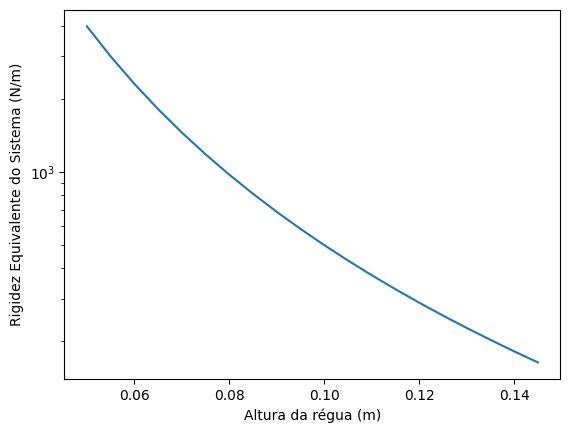

In [6]:
if sim == 2:
    regua_l = np.arange(0.05,0.15,0.005) # Altura da regua (m) 
    keq_graf = 12 * E * Ix / np.power(regua_l,3)   # Rigidez equivalente (N/m)

    plt.plot(regua_l, keq_graf)
    plt.yscale('log')
    plt.xlabel('Altura da régua (m)')
    plt.ylabel('Rigidez Equivalente do Sistema (N/m)')
    plt.show()

INPUT: Parâmetros do ADV

In [7]:
if sim == 1:
    b_adv, h_adv, m_adv, L_adv, Lmax, Lmin = sp.symbols('b_adv h_adv m_adv L_adv Lmax Lmin')

if sim == 2:
    b_adv = 10 * e(-3) # Largura da régua do ADV (m)
    h_adv = 0.1 * e(-3) # Espessura da régua do ADV (m)
    m_adv = 20* e(-3) # Massa na ponta do ADV (kg)

    L_adv = 49.4 * e(-3) # Comprimento da régua do ADV (m)
    Lmax = 68 * e(-3) # Comprimento maximo da haste do ADV
    Lmin = 45 * e(-3) # Comprimento minimo da haste do ADV

Rigidez e frequência natural do ADV

In [8]:
Iadv = (b_adv * np.power(h_adv,3) )/12 # Momento de Inercia da régua do ADV (m^4)
Kx_adv = 12 * E * Iadv / np.power(L_adv,3) # Rigidez da régua do ADV (N/m)
K_adv = Kx_adv * np.power(L_adv,2) # Rigidez da régua do ADV (N*m/rad)

wa = sp.sqrt( (K_adv + m_adv*g*L_adv)/(m_adv* np.power(L_adv,2)) ) # Frequencia natural APENAS ADV (rad/s)
wa_hz = wa / (2* sp.pi) # Frequencia natural do ADV (Hz)

if sim == 2:
    print(f'L_adv = {L_adv*100:.2f} cm | K_adv = {K_adv:.2f} N*m/rad | wa_hz = {wa_hz:.2f} Hz')

display("Iadv [m^4]", Iadv, "wa [rad/s]", wa)

L_adv = 4.94 cm | K_adv = 0.04 N*m/rad | wa_hz = 5.21 Hz


'Iadv [m^4]'

8.333333333333335e-16

'wa [rad/s]'

32.7041822537385

Faixa de operação do ADV

In [9]:
Kxmin_adv = 12 * E * Iadv / np.power(Lmax,3)
wamin = sp.sqrt( (Kxmin_adv*np.power(Lmax,2) + m_adv*g*Lmax)/(m_adv* np.power(Lmax,2)) ) # Frequencia natural APENAS ADV (rad/s)
wamin_hz = wamin / (2* sp.pi) # Frequencia natural do ADV (Hz)


Kxmax_adv = 12 * E * Iadv / np.power(Lmin,3)
wamax = sp.sqrt( (Kxmax_adv*np.power(Lmin,2) + m_adv*g*Lmin)/(m_adv* np.power(Lmin,2)) ) # Frequencia natural APENAS ADV (rad/s)
wamax_hz = wamax / (2* sp.pi) # Frequencia natural do ADV (Hz)

if sim == 2:
    print(f'Faixa de operação do ADV: de {wamin_hz:.2f}Hz a {wamax_hz:.2f}Hz')

display("Frequencia Mínima [Hz]", wamin_hz, "Frequência Máxima [Hz]", wamax_hz)

Faixa de operação do ADV: de 3.48Hz a 5.89Hz


'Frequencia Mínima [Hz]'

10.9338943563977/pi

'Frequência Máxima [Hz]'

18.5085343455769/pi

Gráfico de Frequência Natural em função do comprimento do ADV

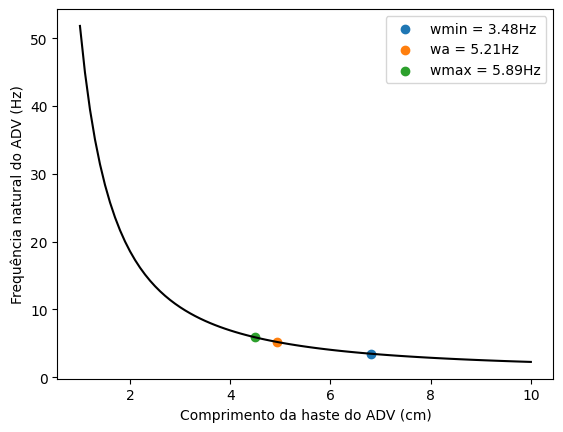

In [10]:
if sim == 2:
    adv_l = np.arange(1*e(-2),10*e(-2),1*e(-3)) # Comprimento do ADV (m)
    adv_k = 12 * E * Iadv / np.power(adv_l,3) # Rigidez da haste do ADV (N/m)

    wagraf = ( (adv_k*np.power(adv_l,2) + m_adv*g*adv_l)/(m_adv* (adv_l**2)) )**0.5 # Frequencia natural APENAS ADV (rad/s)
    wagraf_hz = wagraf / (2* np.pi) # Frequencia natural do ADV (Hz)

    plt.plot(adv_l*100, wagraf_hz, color="black")
    #plt.yscale('log')
    plt.xlabel('Comprimento da haste do ADV (cm)')
    plt.ylabel('Frequência natural do ADV (Hz)')

    plt.scatter(100*Lmax,wamin_hz, label=f'wmin = {wamin_hz:.2f}Hz')
    plt.scatter(100*L_adv,wa_hz, label=f'wa = {wa_hz:.2f}Hz')
    plt.scatter(100*Lmin,wamax_hz, label=f'wmax = {wamax_hz:.2f}Hz')

    #plt.ylim(0, 20)

    plt.legend()
    plt.show()

Equacionamento da Bancada com ADV


    Mesa: x(t)
    ADV: x2(t)

Declaração das variáveis da Mesa

In [11]:
t = sp.symbols('t') # Variável Tempo
x, y, theta, x2, F = sp.symbols('x y theta x2 F', cls=sp.Function) # Variam com o tempo

x = x(t) # Horizontal Mesa
y = y(t) # Vertical Mesa

dx = sp.diff(x, t) # Velocidade X Mesa
dy = sp.diff(y, t) # Velocidade Y Mesa

F = F(t) # Força de excitação

# CONDIÇÕES DE CONTORNO DA MESA
y = 0 # Posição Vertical da Mesa na origem
dy = 0 # Velocidade Vertical da Mesa nula

#print(f"{t} | {x} -> {dx} | {y} -> {dy} | {F}")

Declaração das variáveis do ADV

In [12]:
x2 = x2(t)
difx2 = sp.diff(x2, t)

theta = x2 / L_adv # Ângulo do pêndulo do ADV
dtheta = sp.diff(theta, t) # Velocidade THETA ADV

xa = x - L_adv * sp.sin(theta) # Posição X da massa do ADV
dxa = sp.diff(xa, t) # Velocidade X da massa do ADV

ya = y - L_adv * (sp.cos(theta)) # Posição Y da massa do ADV
dya = sp.diff(ya, t) # Velocidade Y da massa do ADV


print(f"x2 = {x2}  -> \ndifx2 = {difx2}  \n\nxa = {xa} -> \ndxa = {dxa} \n\nya = {ya} -> \ndya = {dya} ")

x2 = x2(t)  -> 
difx2 = Derivative(x2(t), t)  

xa = x(t) - 0.0494*sin(20.2429149797571*x2(t)) -> 
dxa = -1.0*cos(20.2429149797571*x2(t))*Derivative(x2(t), t) + Derivative(x(t), t) 

ya = -0.0494*cos(20.2429149797571*x2(t)) -> 
dya = 1.0*sin(20.2429149797571*x2(t))*Derivative(x2(t), t) 


Formulação por Lagrange

In [13]:
V = (0.5*keq/np.power(L_regua,2))*np.power(x,2) + 0.5*K_adv*np.power(theta,2) + m_adv*g*ya # Energia Potencial
T = 0.5*m_mesa*np.power(dx,2) + 0.5*m_adv*(np.power(dxa,2) + np.power(dya,2)) # Energia Cinética
L = T - V # Lagrangiana
L = L.doit()

display('Energia Potencial (V) = ', V)
display('Energia Cinética (T) = ', T)
display('Lagrangiana do Sistema 2GDL (L) = ', L)

'Energia Potencial (V) = '

577.256944444445*x(t)**2 + 8.70980540934327*x2(t)**2 - 0.00969228*cos(20.2429149797571*x2(t))

'Energia Cinética (T) = '

0.01*(-1.0*cos(20.2429149797571*x2(t))*Derivative(x2(t), t) + Derivative(x(t), t))**2 + 0.01*sin(20.2429149797571*x2(t))**2*Derivative(x2(t), t)**2 + 0.5*Derivative(x(t), t)**2

'Lagrangiana do Sistema 2GDL (L) = '

0.01*(-1.0*cos(20.2429149797571*x2(t))*Derivative(x2(t), t) + Derivative(x(t), t))**2 - 577.256944444445*x(t)**2 - 8.70980540934327*x2(t)**2 + 0.01*sin(20.2429149797571*x2(t))**2*Derivative(x2(t), t)**2 + 0.00969228*cos(20.2429149797571*x2(t)) + 0.5*Derivative(x(t), t)**2

Equações do Movimento

In [14]:
eqx = sp.Eq(sp.diff( sp.diff(L, dx), t) - sp.diff(L, x), F) # Equação do movimento da Bancada (x)

eqx2 = sp.Eq(sp.diff( sp.diff(L, difx2), t) - sp.diff(L, x2), 0) # Equação do movimento do ADV (x2)

In [15]:
display('Equação do movimento da Mesa (X):', eqx)

'Equação do movimento da Mesa (X):'

Eq(1154.51388888889*x(t) + 0.404858299595142*sin(20.2429149797571*x2(t))*Derivative(x2(t), t)**2 - 0.02*cos(20.2429149797571*x2(t))*Derivative(x2(t), (t, 2)) + 1.02*Derivative(x(t), (t, 2)), F(t))

In [16]:
display('Equação do movimento do ADV (x2):', eqx2)

'Equação do movimento do ADV (x2):'

Eq(-0.02*(20.2429149797571*sin(20.2429149797571*x2(t))*Derivative(x2(t), t)**2 - 1.0*cos(20.2429149797571*x2(t))*Derivative(x2(t), (t, 2)) + Derivative(x(t), (t, 2)))*cos(20.2429149797571*x2(t)) + 17.4196108186865*x2(t) + 0.02*sin(20.2429149797571*x2(t))**2*Derivative(x2(t), (t, 2)) + 0.404858299595142*sin(20.2429149797571*x2(t))*cos(20.2429149797571*x2(t))*Derivative(x2(t), t)**2 + 0.1962*sin(20.2429149797571*x2(t)), 0)

Realizando aproximações

In [17]:
''' Para ângulos pequenos: 
        sin(theta) = theta  e 
        cos(theta) = 1
'''

eqx_sub = eqx.subs({sp.sin(theta): theta, sp.cos(theta): 1})
eqx_sub = eqx_sub.doit() # Refazendo os cálculos após as aproximações...

eqx2_sub = eqx2.subs({sp.sin(theta): theta, sp.cos(theta): 1})
eqx2_sub = eqx2_sub.doit() # Refazendo os cálculos após as aproximações...

Novas equações dos movimentos após aproximações

In [18]:

display('EQUAÇÃO DO MOVIMENTO DA MESA', eqx_sub)
display('EQUAÇÃO DO MOVIMENTO DO ADV', eqx2_sub)

'EQUAÇÃO DO MOVIMENTO DA MESA'

Eq(1154.51388888889*x(t) + 8.19551213755348*x2(t)*Derivative(x2(t), t)**2 + 1.02*Derivative(x(t), (t, 2)) - 0.02*Derivative(x2(t), (t, 2)), F(t))

'EQUAÇÃO DO MOVIMENTO DO ADV'

Eq(8.19551213755348*x2(t)**2*Derivative(x2(t), (t, 2)) + 21.3912707377149*x2(t) - 0.02*Derivative(x(t), (t, 2)) + 0.02*Derivative(x2(t), (t, 2)), 0)

Transformando de "funções deriváveis e derivadas" para variáveis simbólicas

In [19]:
if sim ==2:
    x_t, dx_t, d2x_t = sp.symbols('x_t dx_t d2x_t')
    x2_t, difx2_t, dif2x2_t = sp.symbols('x2_t difx2_t dif2x2_t')

Novas equações com variáveis simbólicas

In [20]:
if sim == 1:
    eq_mesa = eqx_sub
    eq_adv = eqx2_sub

    display('EQUAÇÃO DO MOVIMENTO DA MESA', eq_mesa, 'EQUAÇÃO DO MOVIMENTO DO ADV', eq_adv)
    
if sim == 2:
    eq_mesa = eqx_sub.subs({sp.diff(x,t,t): d2x_t, sp.diff(x,t): dx_t, x: x_t, x2: x2_t, sp.diff(x2,t): difx2_t, sp.diff(x2,t,t): dif2x2_t})
    eq_adv = eqx2_sub.subs({sp.diff(x,t,t): d2x_t, sp.diff(x,t): dx_t, x: x_t, x2: x2_t, sp.diff(x2,t): difx2_t, sp.diff(x2,t,t): dif2x2_t})

    display('EQUAÇÃO DO MOVIMENTO DA MESA', eq_mesa)
    display('EQUAÇÃO DO MOVIMENTO DO ADV', eq_adv)

'EQUAÇÃO DO MOVIMENTO DA MESA'

Eq(1.02*d2x_t - 0.02*dif2x2_t + 8.19551213755348*difx2_t**2*x2_t + 1154.51388888889*x_t, F(t))

'EQUAÇÃO DO MOVIMENTO DO ADV'

Eq(-0.02*d2x_t + 8.19551213755348*dif2x2_t*x2_t**2 + 0.02*dif2x2_t + 21.3912707377149*x2_t, 0)

Soluções de X e X2

In [21]:
xz, X, x2z, X2, t, w, Fx, Fmax = sp.symbols('x X x2 X2 t w Fx Fmax')

xz = X * sp.exp(sp.sqrt(-1)*w*t)
dxz = sp.diff(xz,t)
d2xz = sp.diff(xz,t,t)
print(f'x(t) = {xz} | dx(t) = {dxz} | d2x(t) = {d2xz}')

x2z = X2 * sp.exp(sp.sqrt(-1)*w*t)
dx2z = sp.diff(x2z,t)
d2x2z = sp.diff(x2z,t,t)
print(f'x2(t) = {x2z} | dx2(t) = {dx2z} | d2x2(t) = {d2x2z}')

expo = sp.exp(sp.sqrt(-1)*w*t)
Fx = Fmax*sp.exp(sp.sqrt(-1)*w*t)
print(f'F(t) = {Fx}')

x(t) = X*exp(I*t*w) | dx(t) = I*X*w*exp(I*t*w) | d2x(t) = -X*w**2*exp(I*t*w)
x2(t) = X2*exp(I*t*w) | dx2(t) = I*X2*w*exp(I*t*w) | d2x2(t) = -X2*w**2*exp(I*t*w)
F(t) = Fmax*exp(I*t*w)


Substituindo as soluções nas equações dos movimentos

In [22]:
if sim == 1:
    
    d2x = sp.diff(x,t,t)
    dx2 = sp.diff(x2,t)
    d2x2 = sp.diff(x2,t,t)

    eq_mesa = eq_mesa.replace(d2x, d2xz)
    eq_mesa = eq_mesa.replace(dx, dxz)
    eq_mesa = eq_mesa.replace(x, xz)
    eq_mesa = eq_mesa.replace(d2x2, d2x2z)
    eq_mesa = eq_mesa.replace(dx2, dx2z)
    eq_mesa = eq_mesa.replace(x2, x2z)
    eq_mesa = eq_mesa.replace(F, Fx)
    eq_mesa = eq_mesa.subs(expo,1)
    eq_mesa = eq_mesa.subs(sp.sqrt(-1), 0)
    eq_mesa = eq_mesa.subs({X2**3: 0})
    eq_mesa.doit()
    display("Equação da mesa:", eq_mesa)

    eq_adv = eq_adv.replace(d2x, d2xz)
    eq_adv = eq_adv.replace(dx, dxz)
    eq_adv = eq_adv.replace(x, xz)
    eq_adv = eq_adv.replace(d2x2, d2x2z)
    eq_adv = eq_adv.replace(dx2, dx2z)
    eq_adv = eq_adv.replace(x2, x2z)
    eq_adv = eq_adv.replace(F, Fx)
    eq_adv = eq_adv.subs(expo,1)
    eq_adv = eq_adv.subs(sp.sqrt(-1), 0)
    eq_adv = eq_adv.subs({X2**3: 0})
    eq_adv.doit()
    display("Equação do ADV:", eq_adv)

    eq_adv = eq_adv.doit()

    

In [23]:
if sim == 2:

    eq_mesa = eq_mesa.subs({x_t: xz, dx_t: dxz, d2x_t: d2xz, x2_t: x2z, difx2_t: dx2z, dif2x2_t: d2x2z})
    eq_mesa = sp.Eq(eq_mesa.lhs,Fx)
    eq_mesa = eq_mesa.subs({expo: 1})
    eq_mesa = eq_mesa.subs({X2**3: 0})

    eq_adv = eq_adv.subs({x_t: xz, dx_t: dxz, d2x_t: d2xz, x2_t: x2z, difx2_t: dx2z, dif2x2_t: d2x2z})
    eq_adv = eq_adv.subs({expo:1})
    eq_adv = eq_adv.subs({X2**3: 0})

    display('EQUAÇÃO DO MOVIMENTO DA MESA', eq_mesa)
    display('EQUAÇÃO DO MOVIMENTO DO ADV', eq_adv)

'EQUAÇÃO DO MOVIMENTO DA MESA'

Eq(-1.02*X*w**2 + 1154.51388888889*X + 0.02*X2*w**2, Fmax)

'EQUAÇÃO DO MOVIMENTO DO ADV'

Eq(0.02*X*w**2 - 0.02*X2*w**2 + 21.3912707377149*X2, 0)

Coletando coeficientes de X e X2 para construir o sistema na forma matricial

In [24]:
coefx_mesa = eq_mesa.lhs.coeff(X)
coeft_mesa = eq_mesa.lhs.coeff(X2)

if coeft_mesa == 0:
    #Por algum motivo nao esta reconhecendo o coeficiente de X2 na mesa
    #Mas atraves da visualização da equação, pode-se afirmar que
    coeft_mesa = 0.5 * m_adv * (2* np.power(w,2))

coefx_adv = eq_adv.lhs.coeff(X)
coeft_adv = eq_adv.lhs.coeff(X2)

if coefx_adv == 0:
    #Por algum motivo nao esta reconhecendo o coeficiente de X na adv
    #Mas atraves da visualização da equação, pode-se afirmar que
    coefx_adv = 0.5 * m_adv * (2* np.power(w,2))

coefx = [coefx_mesa, coefx_adv]
coeft = [coeft_mesa, coeft_adv]

display("Coeficientes de X [mesa, adv]", coefx, "Coeficientes de X2 [mesa, adv]", coeft)

'Coeficientes de X [mesa, adv]'

[1154.51388888889 - 1.02*w**2, 0.02*w**2]

'Coeficientes de X2 [mesa, adv]'

[0.02*w**2, 21.3912707377149 - 0.02*w**2]

Montando as matrizes do sistema

In [25]:
Z = [
    [coefx_mesa, coeft_mesa],
    [coefx_adv, coeft_adv]
     ]
Z = sp.Matrix(Z, num_columns=100)
display("Z =", Z)

GDL = [X],[X2]
GDL = sp.Matrix(GDL)
display("GDL:", GDL)

Ft = [
    [Fmax],
    [0]
      ]
Ft = sp.Matrix(Ft)
display("F(t) =", Ft)

'Z ='

Matrix([
[1154.51388888889 - 1.02*w**2,                    0.02*w**2],
[                   0.02*w**2, 21.3912707377149 - 0.02*w**2]])

'GDL:'

Matrix([
[ X],
[X2]])

'F(t) ='

Matrix([
[Fmax],
[   0]])

Determinante da matriz de impedância para encontrar os autovalores

In [26]:
detZ = sp.det(Z) 
eqz = sp.Eq(detZ, 0)

display('detZ = 0', eqz)

'detZ = 0'

Eq(0.02*w**4 - 44.909373930247*w**2 + 24696.5191676743, 0)

Determinação das frequências dos modos de vibrar

In [27]:
if sim == 2:
    sol = sp.solve(detZ) # Autovalores (frequências dos modos de vibrar)

    w1 = sol[2] # 1º modo de vibrar (rad/s)
    w1_hz = w1 / (2* np.pi) # rad/s para Hz

    w2 = sol[3] # 2º modo de vibrar (rad/s)
    w2_hz = w2 / (2* np.pi) # rad/s para Hz

    print(f'Freq. Natural MESA isolada: wn = {wn_hz:.2f} Hz')
    print(f'Freq. Natural ADV isolado: wa = {wa_hz:.2f} Hz\n')

    print(f'Freq. Modo de Vibrar 1: w1 = {w1_hz:.2f} Hz')
    print(f'Freq. Modo de Vibrar 2: w2 = {w2_hz:.2f} Hz')

Freq. Natural MESA isolada: wn = 5.21 Hz
Freq. Natural ADV isolado: wa = 5.21 Hz

Freq. Modo de Vibrar 1: w1 = 4.94 Hz
Freq. Modo de Vibrar 2: w2 = 5.70 Hz


Vetores Modais

In [28]:
if sim == 2:
    
    # Modo 1
    A11, A12 = sp.symbols('A11 A12')
    vmod1 = Z[0] * A11 + Z[1]* A12
    vmod1 = vmod1.subs({w: w1})
    svmod1 = sp.solve(vmod1)

    vmod1 = [
        [svmod1[0][A11]],
        [A12]
    ]


    # Modo 2
    A21, A22 = sp.symbols('A21 A22')
    vmod2 = Z[2] * A21 + Z[3]* A22
    vmod2 = vmod2.subs({w: w2})
    svmod2 = sp.solve(vmod2)

    vmod2 = [
        [svmod2[0][A21]],
        [A22]
    ]

    print(f'Vetor Modal 1: {vmod1}')
    print(f'Vetor Modal 2: {vmod2}')

Vetor Modal 1: [[-0.111347986249562*A12], [A12]]
Vetor Modal 2: [[0.166400664157675*A22], [A22]]


Matriz adjunta para encontrar os numeradores das respostas de X e X2

In [29]:
# Matriz adjunta de Z
adjZ = [
    [Z[3], -Z[1]],
    [-Z[2], Z[0]]
]

# Numeradores das respostas de X e X2
resp_num = [
    adjZ[0][0]*Ft[0] + adjZ[0][1]*Ft[1],
    adjZ[1][0]*Ft[0] + adjZ[1][1]*Ft[1]
]

# Denominadores das respostas de X e X2
resp_den = detZ


display('Numerador (X) =', resp_num[0], "Numerador (X2) = ", resp_num[1])
display('Denominadores =', resp_den)


'Numerador (X) ='

Fmax*(21.3912707377149 - 0.02*w**2)

'Numerador (X2) = '

-0.02*Fmax*w**2

'Denominadores ='

0.02*w**4 - 44.909373930247*w**2 + 24696.5191676743

Força de excitação

In [30]:
if sim == 1: 
    m_e, r_e, w_e = sp.symbols('m_e r_e w_e')

if sim == 2:
    m_e = 50 * e(-3) #massa excentrica (kg)
    r_e = 10 * e(-3) #raio excentrico (m)
    w_e = wa #frequencia de excitação

F0 = m_e * np.power(w_e,2) * r_e

F0min = m_e * np.power(wamin,2) * r_e
F0max = m_e * np.power(wamax,2) * r_e

display(sp.Eq(Fmax, F0))

Eq(Fmax, 0.534781768442872)

Respostas de X e X2

In [31]:
# Juntar na equação os numeradores e os denominadores
resp_X = resp_num[0]/resp_den
resp_X2 = resp_num[1]/resp_den

X_F = resp_X/Fmax # X/F
display('X/F =', X_F)

Xmax = abs( X_F.replace(w,wa) * F0 )
display("Amplitude máxima de X [mm] ", Xmax*1000)

X2_F = resp_X2/Fmax # X2/F
display('X2/F =', X2_F)

X2max = abs( X2_F.replace(w,wa) * F0  )
display("Amplitude máxima de X2 [mm] ", X2max*1000)


'X/F ='

(21.3912707377149 - 0.02*w**2)/(0.02*w**4 - 44.909373930247*w**2 + 24696.5191676743)

'Amplitude máxima de X [mm] '

4.15206011176414e-15

'X2/F ='

-0.02*w**2/(0.02*w**4 - 44.909373930247*w**2 + 24696.5191676743)

'Amplitude máxima de X2 [mm] '

25.0000000000002

Gráfico adimensional da resposta de X (com ADV e sem ADV)

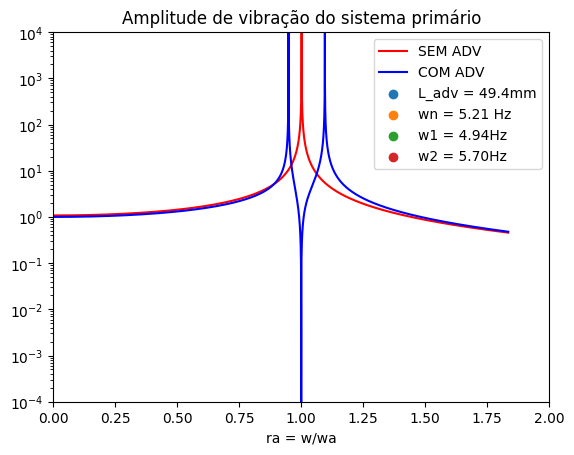

In [32]:
if sim == 2:

    wgraf = np.arange(0, 60, 0.001) 
    wgraf_hz = wgraf/(2*np.pi)

    r = wgraf_hz / wn_hz
    ra = wgraf_hz / wa_hz

    X_F = sp.lambdify(w, X_F, 'numpy')
    X_F = np.abs(X_F(wgraf))
    KX_F = X_F * Kx_regua*4 # Resposta adimensional

    # Usa-se 4*Kx_regua pois X se trata do deslocamento horizontal, que é resistido pela rigidez a flexao da regua

    # Resposta da mesa vibrando SEM ADV
    KX_S_ADV = abs( ( Kx_regua*4 * np.power(L_regua,2) ) / ( (1- np.power((wgraf/wn),2) ) * (keq - m_mesa*g*L_regua) ) )


    plt.semilogy(ra, KX_S_ADV, label="SEM ADV", color="red")
    plt.semilogy(ra, KX_F, label="COM ADV", color='blue')

    plt.title('Amplitude de vibração do sistema primário')

    plt.xlabel('ra = w/wa')
    plt.xlim(0, 2)
    plt.ylim(e(-4), e(4))

    plt.scatter(w2_hz,0, label=f'L_adv = {1000*L_adv:.1f}mm')
    label_wn = f'wn = {wn_hz:.2f} Hz'
    plt.scatter(wn_hz,0, label=label_wn)
    plt.scatter(w1_hz,0, label=f'w1 = {w1_hz:.2f}Hz')
    plt.scatter(w2_hz,0, label=f'w2 = {w2_hz:.2f}Hz')


    plt.legend()
    plt.show()

Avaliando as amplitudes de X2

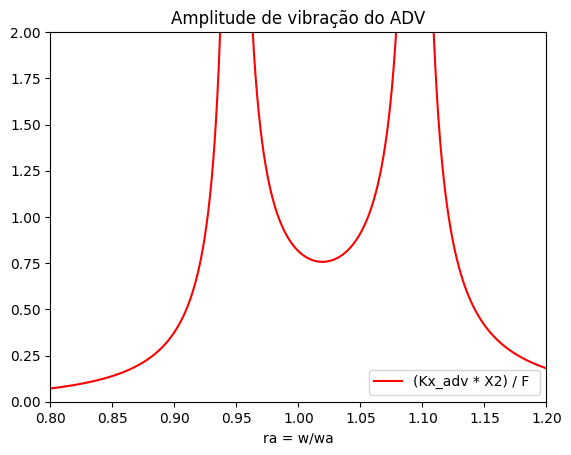

In [33]:
if sim == 2:
    X2_F = sp.lambdify(w, X2_F, 'numpy')
    X2_F = np.abs(X2_F(wgraf))
    KX2_F = X2_F * Kx_adv # Resposta adimensional

    plt.plot(ra, KX2_F, label="(Kx_adv * X2) / F ", color="red")
    #plt.yscale('log')

    plt.title('Amplitude de vibração do ADV')

    plt.xlabel('ra = w/wa')
    plt.xlim(0.8, 1.2)
    plt.ylim(0, 2)

    plt.legend()
    plt.show()

Gráfico das amplitudes de X e X2

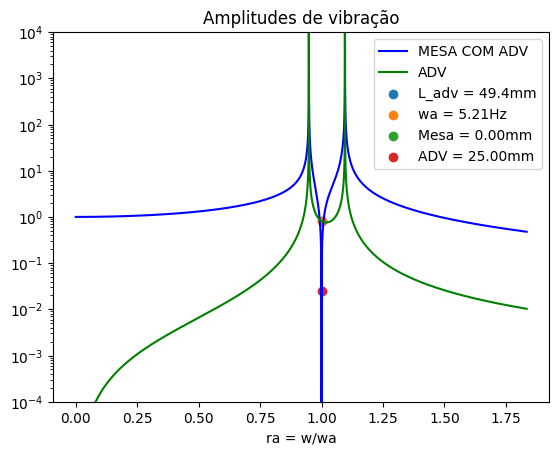

Amplitude (X) em 3.48 Hz: 0.36mm
Amplitude (X) em 5.21 Hz: 0.00mm
Amplitude (X) em 5.89 Hz: 6.00mm


In [34]:
if sim == 2: 
    for i,rx in enumerate(ra):
        if rx <= 1:
            indice = i
        else:
            break

    yX = KX_F[indice]
    Ax = F0 * yX/ (Kx_regua*4) #amplitude de X (m)

    yX2 = KX2_F[indice]
    Ax2 = F0 * yX2/ (Kx_adv) #amplitude de X2 (m)

    plt.title('Amplitudes de vibração')

    plt.plot(ra, KX_F, label="MESA COM ADV", color='blue')
    plt.plot(ra, KX2_F, label="ADV", color="green")

    plt.xlabel('ra = w/wa')
    #plt.xlim(0, 1.4)
    plt.ylim(e(-4), e(4))

    plt.scatter(1,yX2, label=f'L_adv = {1000*L_adv:.1f}mm')
    plt.scatter(1,yX2, label=f'wa = {wa_hz:.2f}Hz')
    plt.scatter(1,Xmax, label=f'Mesa = {1000*Xmax:.2f}mm')
    plt.scatter(1,X2max, label=f'ADV = {1000*X2max:.2f}mm')

    plt.yscale('log')
    plt.legend()
    plt.show()

    for ii,rxx in enumerate(ra):
        if rxx <= 3.48/5.21: # quando L_adv = Lmax
            imin = ii
        if rxx <= 1:
            i1 = ii
        if rxx <= 5.89/5.21:
            imax = ii
        else:
            break

    print(f'Amplitude (X) em {wamin_hz:.2f} Hz: {1000*F0min * KX_F[imin] / (4*Kx_regua):.2f}mm')
    print(f'Amplitude (X) em {wa_hz:.2f} Hz: {1000*F0 * KX_F[i1] / (4*Kx_regua):.2f}mm')
    print(f'Amplitude (X) em {wamax_hz:.2f} Hz: {1000*F0max * KX_F[imax] / (4*Kx_regua):.2f}mm')

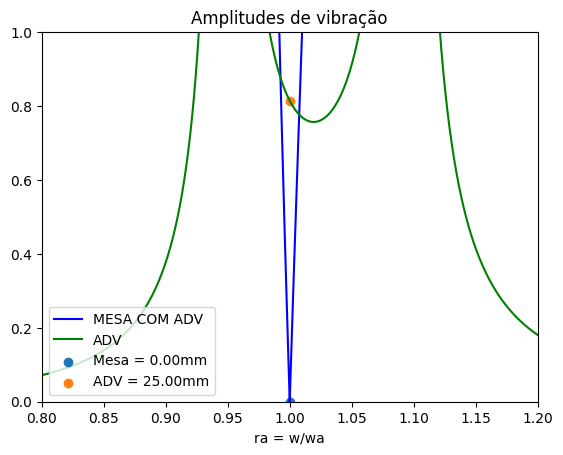

In [35]:
if sim == 2:
    plt.title('Amplitudes de vibração')

    plt.plot(ra, KX_F, label="MESA COM ADV", color='blue')
    plt.plot(ra, KX2_F, label="ADV", color="green")

    plt.xlabel('ra = w/wa')
    plt.xlim(0.8, 1.2)
    plt.ylim(0, 1)

    plt.scatter(1,yX, label=f'Mesa = {1000*Ax:.2f}mm')
    plt.scatter(1,yX2, label=f'ADV = {1000*Ax2:.2f}mm')

    #plt.yscale('log')
    plt.legend(loc="lower left")
    plt.show()